In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import os
import pickle

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

c:\Users\ishan\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\Users\ishan\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

In [2]:
df = pd.read_csv('MVP_Candidates.csv')
df.fillna(0)

,Unnamed: 0.1,Unnamed: 0,Player,Pos,Pos_No,Age,Tm,G,GS,Seed,...,6.FT+,6.TS+,6.FTr+,6.3PAr+,6.FG Add,6.TS Add,MVP,MVP Rank,MVP Share,Year
0,0,0,Nikola Jokić,C,5,26,DEN,74,74,10,...,105,117,144,55,230.9,286.9,1,1,0.875,2021-22
1,1,1,Joel Embiid,C,5,27,PHI,68,68,8,...,105,109,243,47,6.5,169.0,0,2,0.706,2021-22
2,2,2,Giannis Antetokounmpo,PF,4,27,MIL,67,67,7,...,93,112,248,49,125.1,211.1,0,3,0.595,2021-22
3,3,3,Devin Booker,SG,2,25,PHO,68,68,1,...,112,102,103,84,-4.1,32.6,0,4,0.216,2021-22
4,4,4,Luka Dončić,PG,1,22,DAL,65,65,5,...,96,101,140,102,-8.9,15.3,0,5,0.146,2021-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,481,481,Bernard King,SF,3,34,WSB,64,64,20,...,103,99,100,30,-38.6,-26.0,0,16,0.007,1990-91
481,482,482,Kenny Smith,PG,1,25,HOU,78,78,8,...,110,112,106,164,115.5,148.1,0,17,0.005,1990-91
482,483,483,Hakeem Olajuwon,C,5,28,HOU,56,50,8,...,101,103,90,5,39.4,31.8,0,18,0.004,1990-91
483,484,484,Tim Hardaway,PG,1,24,GSW,82,82,11,...,105,102,77,198,63.4,44.2,0,19,0.001,1990-91


In [3]:
'''
1990-91 to 1998-99
1999-00 to 2011-12
2012-13 to 2021-22
'''
e1 = ('2021-22', '2020-21', '2019-20', '2018-19', '2017-18', '2016-17', '2015-16', '2014-15', '2013-14', '2012-13')
e2 = ('2011-12', '2010-09', '2008-09', '2007-08', '2006-07', '2005-06', '2004-05', '2003-04', '2002-03', '2001-02', '2000-01')
e3 = ('1999-00', '1998-99', '1997-98', '1996-97', '1995-96', '1994-95', '1993-94', '1992-93', '1991-92', '1990-91')


df1 = df[(df['Year'] == '2011-12') | (df['Year'] == '2010-11') | (df['Year'] == '2009-10') | (df['Year'] == '2008-09') | (df['Year'] == '2007-08') | (df['Year'] == '2006-07') | (df['Year'] == '2005-06') | (df['Year'] == '2004-05') | (df['Year'] == '2003-04') | (df['Year'] == '2002-03') | (df['Year'] == '2001-02') | (df['Year'] == '2000-01')].reset_index(drop=True)


In [4]:
df1

,Unnamed: 0.1,Unnamed: 0,Player,Pos,Pos_No,Age,Tm,G,GS,Seed,...,6.FT+,6.TS+,6.FTr+,6.3PAr+,6.FG Add,6.TS Add,MVP,MVP Rank,MVP Share,Year
0,130,130,LeBron James,SF,3,27,MIA,62,62,4,...,102,115,156,56,156.7,217.8,1,1,0.888,2011-12
1,131,131,Kevin Durant,SF,3,23,OKC,66,66,3,...,114,116,140,117,155.0,250.3,0,2,0.735,2011-12
2,132,132,Chris Paul,PG,1,26,LAC,60,60,9,...,114,110,123,106,61.6,110.7,0,3,0.318,2011-12
3,133,133,Kobe Bryant,SG,2,33,LAL,58,58,6,...,112,100,122,95,-67.1,-1.6,0,4,0.291,2011-12
4,134,134,Tony Parker,PG,1,29,SAS,60,60,2,...,106,102,116,30,0.6,25.0,0,5,0.274,2011-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,305,305,Paul Pierce,SF,3,23,BOS,82,82,20,...,100,109,158,149,90.2,167.6,0,13,0.004,2000-01
176,306,306,Jerry Stackhouse,SG,2,26,DET,80,80,21,...,110,101,136,144,-108.3,15.0,0,14,0.002,2000-01
177,307,307,Michael Finley,SF,3,27,DAL,82,82,5,...,104,101,68,100,45.3,9.5,0,15,0.001,2000-01
178,308,308,Anthony Mason,PF,4,34,MIA,80,80,9,...,104,107,161,0,17.8,85.9,0,15,0.001,2000-01


In [5]:
df1.drop(df1.columns[[0, 1]], axis = 1, inplace=True)

In [6]:
#df1['6.3P+'][108] = 0
''' WHY WAS THIS NaN I HAVE NO CLUE - FILLNA SHOULD HAVE MADE IT ZERO '''
''' ANYWAY PROBLEM SOLVED '''

' ANYWAY PROBLEM SOLVED '

In [7]:
df1.to_csv('LessModernEra.csv', index=False)

In [8]:
df1

,Player,Pos,Pos_No,Age,Tm,G,GS,Seed,Win %,1.MP,...,6.FT+,6.TS+,6.FTr+,6.3PAr+,6.FG Add,6.TS Add,MVP,MVP Rank,MVP Share,Year
0,LeBron James,SF,3,27,MIA,62,62,4,0.696970,2326,...,102,115,156,56,156.7,217.8,1,1,0.888,2011-12
1,Kevin Durant,SF,3,23,OKC,66,66,3,0.712121,2546,...,114,116,140,117,155.0,250.3,0,2,0.735,2011-12
2,Chris Paul,PG,1,26,LAC,60,60,9,0.606061,2181,...,114,110,123,106,61.6,110.7,0,3,0.318,2011-12
3,Kobe Bryant,SG,2,33,LAL,58,58,6,0.621212,2232,...,112,100,122,95,-67.1,-1.6,0,4,0.291,2011-12
4,Tony Parker,PG,1,29,SAS,60,60,2,0.757576,1923,...,106,102,116,30,0.6,25.0,0,5,0.274,2011-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Paul Pierce,SF,3,23,BOS,82,82,20,0.439024,3120,...,100,109,158,149,90.2,167.6,0,13,0.004,2000-01
176,Jerry Stackhouse,SG,2,26,DET,80,80,21,0.390244,3215,...,110,101,136,144,-108.3,15.0,0,14,0.002,2000-01
177,Michael Finley,SF,3,27,DAL,82,82,5,0.646341,3443,...,104,101,68,100,45.3,9.5,0,15,0.001,2000-01
178,Anthony Mason,PF,4,34,MIA,80,80,9,0.609756,3254,...,104,107,161,0,17.8,85.9,0,15,0.001,2000-01


In [9]:
def calc_metrics(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

In [10]:
seasons = ['2011-12', '2010-11', '2009-10' ,'2008-09', '2007-08', '2006-07', '2005-06', '2004-05', '2003-04', '2002-03', '2001-02', '2000-01']

In [11]:
col_to_drop = []
for i in df1.columns:
    if i[0] == '3' or i[0] == '4':
        col_to_drop.append(i)

In [12]:
season_metrics = {season:[] for season in seasons}
all_results = pd.DataFrame(columns = ['Year', 'Player', 'MVP Share', 'MVP Rank', 'Predicted MVP Share'])

In [13]:
for season in seasons:
    
    testing_data = df1[(df1['Year'] == season)].copy()
    training_data = df1[(df1['Year'] != season)].copy()
    X_train = training_data.drop(['Player', 'Age', 'Pos', 'Pos_No', 'Tm', 'MVP', 'MVP Rank', 'MVP Share', 'Year'] + col_to_drop, axis=1)
    Y_train = training_data['MVP Share']
    X_test = testing_data.drop(['Player', 'Age', 'Pos', 'Pos_No', 'Tm', 'MVP', 'MVP Rank', 'MVP Share', 'Year'] + col_to_drop, axis=1)
    Y_test = testing_data['MVP Share']

    X_train.fillna(0)
    X_test.fillna(0)

    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    final_params = []

    param_grid = {'alpha':[0.01,0.1,1,5,10,50,100],
                    'l1_ratio':[0.01,0.1,0.5,0.7,0.95,0.99,1]}
    elastic_net_model = ElasticNet()
    grid = GridSearchCV(elastic_net_model, param_grid)
    grid.fit(scaled_X_train, Y_train)
    grid.best_params_
    model = ElasticNet(**grid.best_params_)
    final_params.append(grid.best_params_)

    model.fit(scaled_X_train, Y_train)

    Y_pred = model.predict(scaled_X_test)

    rmse, r2 = calc_metrics(Y_test, Y_pred)

    season_metrics[season] += [rmse, r2]

    initial_results = testing_data[['Year', 'Player', 'MVP Share', 'MVP Rank']]
    results = initial_results.copy()
    results['Predicted MVP Share'] = pd.Series(Y_pred).values
    results = results.sort_values('Predicted MVP Share', ascending=False).reset_index(drop=True)

    print(results)

    all_results = pd.concat([all_results, results])

       Year             Player  MVP Share  MVP Rank  Predicted MVP Share
0   2011-12       LeBron James      0.888         1             0.426491
1   2011-12       Kevin Durant      0.735         2             0.307716
2   2011-12         Chris Paul      0.318         3             0.178541
3   2011-12        Dwyane Wade      0.005        10             0.155475
4   2011-12       Derrick Rose      0.004        11             0.149435
5   2011-12  Russell Westbrook      0.003        12             0.132708
6   2011-12        Tony Parker      0.274         5             0.099369
7   2011-12        Kobe Bryant      0.291         4             0.085584
8   2011-12      Dwight Howard      0.011         7             0.065976
9   2011-12         Tim Duncan      0.002        14             0.054930
10  2011-12         Kevin Love      0.048         6             0.001201
11  2011-12         Steve Nash      0.006         9            -0.020086
12  2011-12        Rajon Rondo      0.010         8

In [14]:
for i in season_metrics.keys():
    print(i)
    print("RMSE = ", season_metrics[i][0])
    print("R2 = ", season_metrics[i][1])
    print()

2011-12
RMSE =  0.19357864216919932
R2 =  0.5077823614979811

2010-11
RMSE =  0.2096993078501709
R2 =  0.4617360712590287

2009-10
RMSE =  0.17025739129805004
R2 =  0.624661585085947

2008-09
RMSE =  0.17824769295725984
R2 =  0.6608653941747984

2007-08
RMSE =  0.23059170491965683
R2 =  0.29161736009048256

2006-07
RMSE =  0.21020584083217106
R2 =  0.3934522522306865

2005-06
RMSE =  0.225092389710712
R2 =  0.2019092954997499

2004-05
RMSE =  0.31778628013064175
R2 =  -0.42964447339215206

2003-04
RMSE =  0.16521945470889035
R2 =  0.6305642610271323

2002-03
RMSE =  0.20627789918785083
R2 =  0.4413730081377788

2001-02
RMSE =  0.19807149141416505
R2 =  0.36732301097601006

2000-01
RMSE =  0.20995788700699852
R2 =  0.3511098478479058



In [15]:
all_test = all_results['MVP Share']
all_pred = all_results['Predicted MVP Share']
total_rmse, total_r2 = calc_metrics(all_test, all_pred)
print("RMSE = ", total_rmse)
print("R2 = ", total_r2)

RMSE =  0.21374405937176583
R2 =  0.3861991304968039


In [16]:
print(all_results.to_string())

       Year             Player MVP Share MVP Rank Predicted MVP Share
0   2011-12       LeBron James     0.888        1            0.426491
1   2011-12       Kevin Durant     0.735        2            0.307716
2   2011-12         Chris Paul     0.318        3            0.178541
3   2011-12        Dwyane Wade     0.005       10            0.155475
4   2011-12       Derrick Rose     0.004       11            0.149435
5   2011-12  Russell Westbrook     0.003       12            0.132708
6   2011-12        Tony Parker     0.274        5            0.099369
7   2011-12        Kobe Bryant     0.291        4            0.085584
8   2011-12      Dwight Howard     0.011        7            0.065976
9   2011-12         Tim Duncan     0.002       14             0.05493
10  2011-12         Kevin Love     0.048        6            0.001201
11  2011-12         Steve Nash     0.006        9           -0.020086
12  2011-12        Rajon Rondo      0.01        8           -0.026808
13  2011-12      Dir

In [17]:
'''SHAP VARIABLE ANALYSIS - 2021-22 SEASON'''

testing_data = df1[(df1['Year'] == '2010-11')].copy()
training_data = df1[(df1['Year'] != '2010-11')].copy()
X_train = training_data.drop(['Player', 'Age', 'Pos', 'Pos_No', 'Tm', 'MVP', 'MVP Rank', 'MVP Share', 'Year'] + col_to_drop, axis=1)
Y_train = training_data['MVP Share']
X_test = testing_data.drop(['Player', 'Age', 'Pos', 'Pos_No', 'Tm', 'MVP', 'MVP Rank', 'MVP Share', 'Year'] + col_to_drop, axis=1)
Y_test = testing_data['MVP Share']

X_train.fillna(0)
X_test.fillna(0)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

final_params = []

param_grid = {'C': [0.001,0.01,0.1,0.5,1,2,5,10],
                'kernel': ['linear','rbf','poly'],
                'gamma': ['scale','auto'],
                'degree': [2,3,4],
                'epsilon': [0.1,0.5,1]}
svr_model = SVR()
grid = GridSearchCV(svr_model, param_grid)
grid.fit(scaled_X_train, Y_train)
model = SVR(**grid.best_params_)
final_params.append(grid.best_params_)

model.fit(scaled_X_train, Y_train)
#Y_pred = model.predict(scaled_X_test)

explainer = shap.Explainer(model.predict, scaled_X_test)
shap_values = explainer(scaled_X_test)

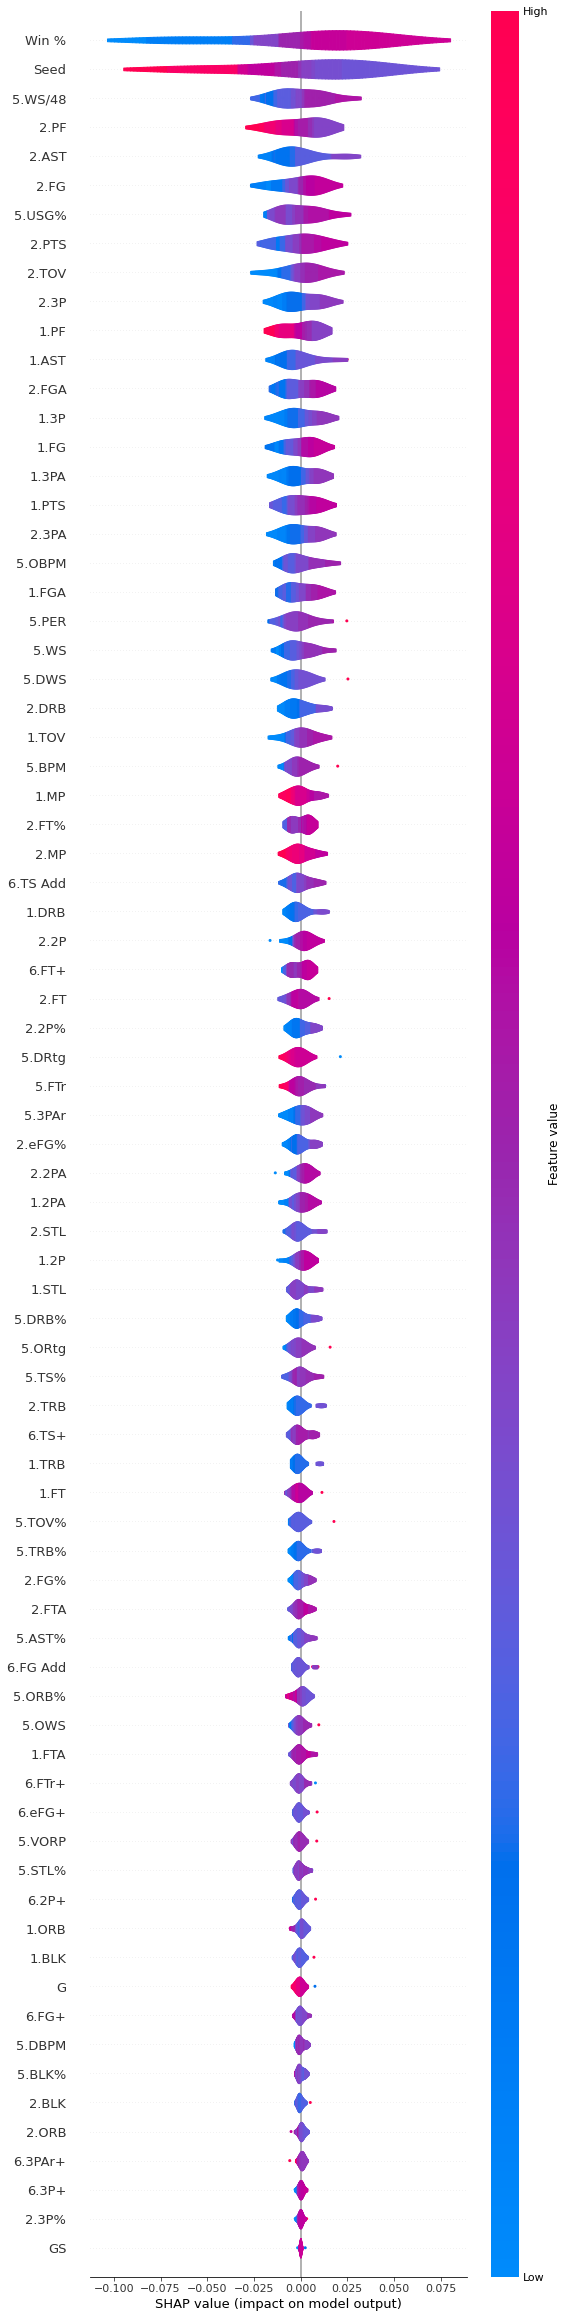

In [18]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns ,plot_type='violin', max_display=len(X_test.columns))

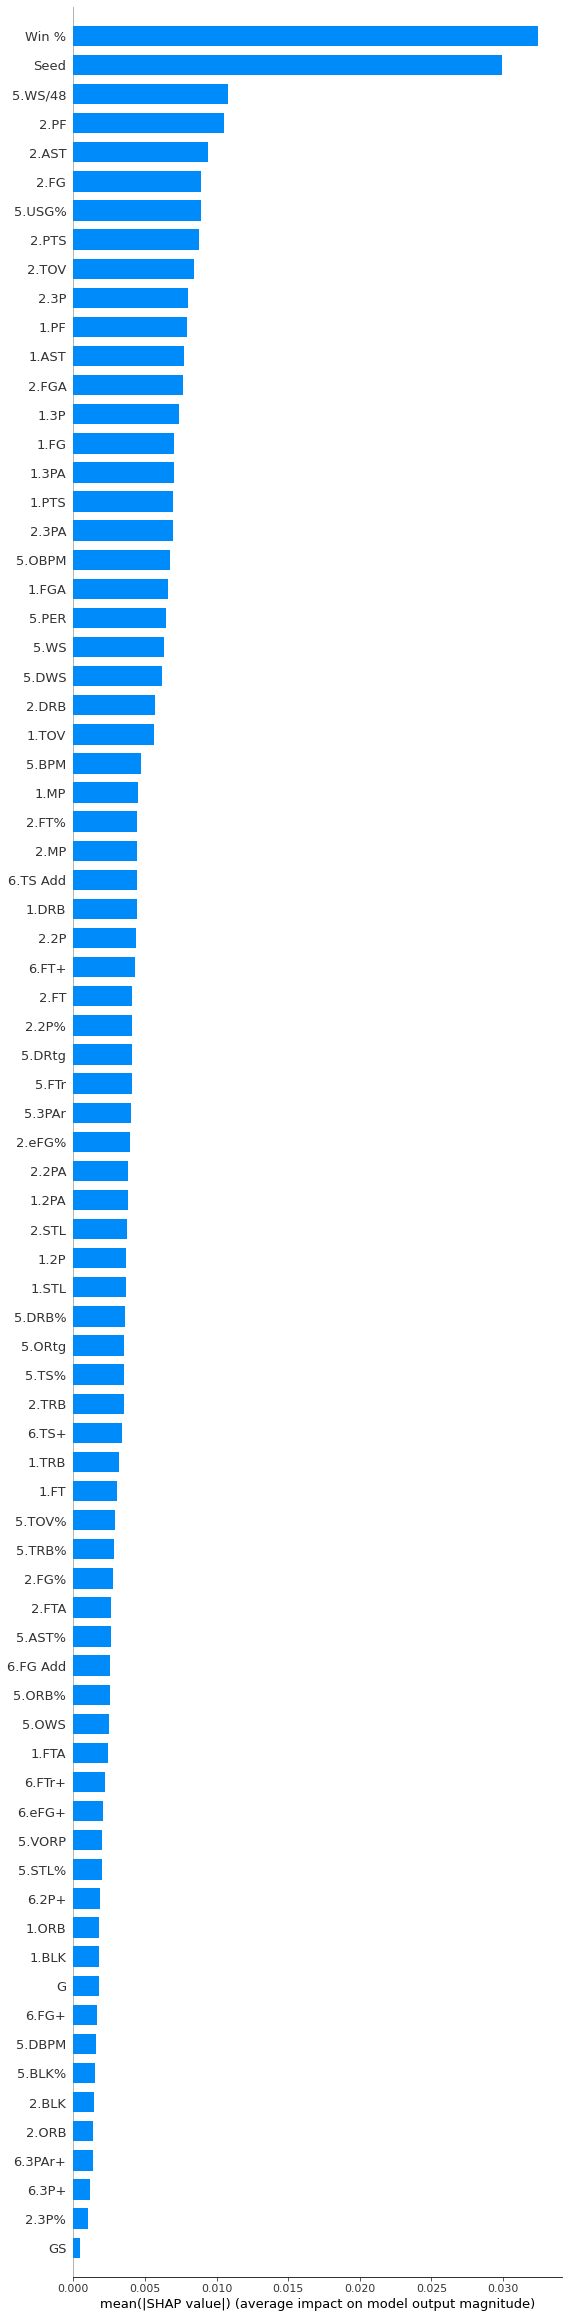

In [19]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns ,plot_type='bar', max_display=len(X_test.columns))